# Testing Model2 on Dataset3

## Counting shapes in binary images: model trained on diamond shapes with different sizes counting images with different shapes (circles, diamonds and squares) with the same radius.

This notebook tests the CNN model for the Counting simple shapes (circles, squares or diamonds) experiment , more specifically trained on diamond shapes with different sizes- Dataset2 (see the training [Notebook](https://github.com/NLeSC/XAI/blob/master/Software/CNNcountDemo/TrainModel2DiamondsDiffSize.ipynb)) and tested on Dataset3. The 'CNNcount' code resides in a [git repository](https://github.com/NLeSC/XAI/tree/master/Software/CNNcountDemo). 

### Settings

In [1]:
# Imports
import warnings
warnings.simplefilter('ignore')

import numpy as np
from numpy import load
import os.path
import matplotlib.pyplot as plt

import keras.backend as K
if(K.tensorflow_backend):
    import tensorflow as tf
    tf.logging.set_verbosity(tf.logging.ERROR)
from keras.utils import np_utils
from keras.models import load_model

from CNNcount import shape_images as si
from CNNcount import model_count_shapes as mcs

Using TensorFlow backend.


### Loading of pre-generated data and formatting of the data and labels.

In [2]:
# filename for loading the data from the NPZ files (NumPy compressed)
diff_shapes_same_radius_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diff_shapes_same_radius_60k.npz"

In [3]:
# input image dimensions and number of classes
img_rows, img_cols = 64, 64
num_classes = 3
NMIN, NMAX = 1, 3  # nbr of shapes
RMIN, RMAX = 2, 6  # shape radius
IMGSIZE = 64
OCCL = 0

#### Data formatting

In [4]:
# load the set of NIM images and get the test subsets
if os.path.isfile(diff_shapes_same_radius_fname): # already generated- just load
    print ("The file containing images of different shapes (circles, diamonds and squares) with same radius already exist!")
    # load from NPZ file for display
    _, _, images_test, _, _, labels_test = si.load_split_data(diff_shapes_same_radius_fname)
    
    
    if K.image_data_format() == 'channels_first':
        images_test = images_test.reshape(images_test.shape[0], 1, img_rows, img_cols)

    print("Size of testing data: ", np.shape(images_test), "and labels: ", np.shape(labels_test))
else: # missing data
    print ("The file containing images of different shapes (circles, diamonds and squares) with same radius does not exist!")
    print("Use the GenerateShapeImages notebook to generate the experimental data.") 

The file containing images of different shapes (circles, diamonds and squares) with same radius already exist!
Size of testing data:  (6000, 64, 64, 1) and labels:  (6000,)


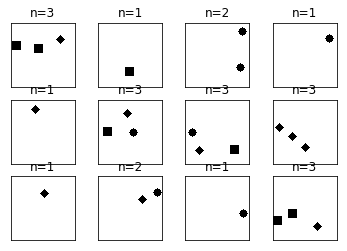

In [5]:
# plot random 12 of the test images
si.plot_12images(images_test, labels_test)

#### Labels formatting.

In [6]:
# convert class vectors to binary class matrices
labels_test = np_utils.to_categorical(labels_test-1, num_classes=None)

In [7]:
print(labels_test)
print('labels_test shape:', labels_test.shape)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
labels_test shape: (6000, 3)


#### CNN model.

In [8]:
# filename for model saving
same_shape_diff_radius_model_fname = "/home/elena/eStep/XAI/Data/CountingShapes/model_diamonds_diff_radii.h5"
# load the trained model
model = load_model(same_shape_diff_radius_model_fname) 
print("Loaded model from disk")

Loaded model from disk


#### Evaluate on test images

In [9]:
score = model.evaluate(images_test, labels_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09882135545214017
Test accuracy: 0.9596666666666667


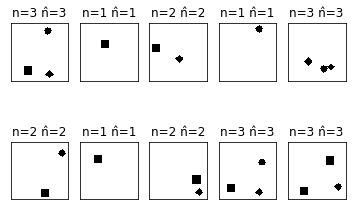

In [10]:
# generate 10 random images and predict the number of shapes using the trained model
num_shapes = len(si.SHAPES)   
shape_radius = int((RMIN+RMAX)/2)

for i in range(10):
    n = int(np.random.randint(NMIN, NMAX+1))        
    shapes = [(np.random.randint(num_shapes), shape_radius) for _ in range(n)]
    img = si.generate_image(IMGSIZE, shapes, OCCL)        
    X = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        
    plt.subplot(2, 5, i+1)
    plt.imshow(img,cmap='binary')
    plt.xticks([])
    plt.yticks([])
        
    predictions = model.predict(X);
    pred = np.argmax(predictions) + 1 # we subtracted 1 before
    plt.title('n=%d n̂=%d' % (n, pred))    


plt.show()